In [83]:
import pandas as pd 
draft = pd.read_csv('/Users/rickeydidio/Desktop/Development/NBA/Second_Round_Picks.csv', header=0)
draft.head()

,Rk,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,College,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
0,1,NBA,2,31,POR,James White\whiteja02,23.256,G-F,us,Cincinnati,...,1.0,0.5,0.3,0.1,0.438,0.482,0.340,0.676,0.8,0.062
1,2,NBA,2,32,HOU,Steve Novak\novakst01,23.021,F,us,Marquette,...,1.3,0.3,0.2,0.1,0.437,0.463,0.430,0.877,14.5,0.123
2,3,NBA,2,33,ATL,Solomon Jones\jonesso01,21.352,F,us,South Florida,...,2.3,0.4,0.2,0.5,0.467,0.472,0.111,0.717,5.0,0.078
3,4,NBA,2,34,LAC,Paul Davis\davispa01,21.347,C,us,Michigan State,...,1.9,0.4,0.3,0.2,0.402,0.404,0.000,0.732,0.5,0.035
4,5,NBA,2,35,TOR,P.J. Tucker\tuckepj01,21.059,F,us,Texas,...,5.7,1.4,1.2,0.3,0.420,0.474,0.358,0.749,34.7,0.083


In [84]:
print(draft.columns)

Index(['Rk', 'Lg', 'Rd', 'Pk', 'Tm', 'Player', 'Age', 'Pos', 'Born', 'College',
       'From', 'To', 'Year', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK',
       'FG%', '2P%', '3P%', 'FT%', 'WS', 'WS/48'],
      dtype='object')


In [85]:
draft.rename(columns={"G": "Games"}, inplace=True)
draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       420 non-null    int64  
 1   Lg       420 non-null    object 
 2   Rd       420 non-null    int64  
 3   Pk       420 non-null    int64  
 4   Tm       420 non-null    object 
 5   Player   420 non-null    object 
 6   Age      396 non-null    float64
 7   Pos      396 non-null    object 
 8   Born     396 non-null    object 
 9   College  318 non-null    object 
 10  From     317 non-null    float64
 11  To       317 non-null    float64
 12  Year     420 non-null    int64  
 13  Games    317 non-null    float64
 14  MP       317 non-null    float64
 15  PTS      317 non-null    float64
 16  TRB      317 non-null    float64
 17  AST      317 non-null    float64
 18  STL      317 non-null    float64
 19  BLK      317 non-null    float64
 20  FG%      314 non-null    float64
 21  2P%      312 non

In [86]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

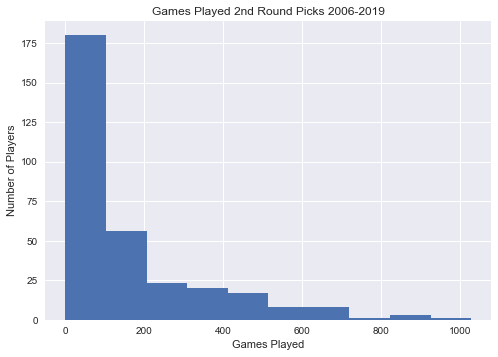

In [87]:
plt.hist(draft["Games"])
plt.title("Games Played 2nd Round Picks 2006-2019")
plt.xlabel("Games Played")
plt.ylabel("Number of Players")
plt.show()

In [90]:
import numpy as np
draft[draft.Games > 0] 
#played_games = draft[draft.Games > 0]
#print(played_games)

,Rk,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,College,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
0,1,NBA,2,31,POR,James White\whiteja02,23.256,G-F,us,Cincinnati,...,1.0,0.5,0.3,0.1,0.438,0.482,0.340,0.676,0.8,0.062
1,2,NBA,2,32,HOU,Steve Novak\novakst01,23.021,F,us,Marquette,...,1.3,0.3,0.2,0.1,0.437,0.463,0.430,0.877,14.5,0.123
2,3,NBA,2,33,ATL,Solomon Jones\jonesso01,21.352,F,us,South Florida,...,2.3,0.4,0.2,0.5,0.467,0.472,0.111,0.717,5.0,0.078
3,4,NBA,2,34,LAC,Paul Davis\davispa01,21.347,C,us,Michigan State,...,1.9,0.4,0.3,0.2,0.402,0.404,0.000,0.732,0.5,0.035
4,5,NBA,2,35,TOR,P.J. Tucker\tuckepj01,21.059,F,us,Texas,...,5.7,1.4,1.2,0.3,0.420,0.474,0.358,0.749,34.7,0.083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,NBA,2,54,PHI,Marial Shayok\shayoma01,23.335,G,ca,Iowa State,...,1.8,0.3,0.0,0.3,0.250,0.167,0.333,0.750,-0.1,-0.130
414,415,NBA,2,55,NYK,Kyle Guy\guyky01,21.318,G,us,Virginia,...,0.8,0.8,0.2,0.0,0.320,0.455,0.214,0.875,0.0,-0.017
416,417,NBA,2,57,NOP,Jordan Bone\bonejo01,21.232,G,us,Tennessee,...,1.2,1.1,0.1,0.0,0.378,0.500,0.286,NaN,0.1,0.019
417,418,NBA,2,58,GSW,Miye Oni\onimi01,21.325,G,us,Yale,...,1.7,0.3,0.2,0.2,0.378,0.350,0.389,0.818,0.6,0.082


In [97]:
draft.sort_values('WS', ascending=False)

,Rk,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,College,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
16,17,NBA,2,47,UTA,Paul Millsap\millspa01,21.143,F,us,Louisiana Tech,...,7.3,2.2,1.3,1.0,0.491,0.514,0.346,0.736,94.0,0.152
64,65,NBA,2,35,LAC,DeAndre Jordan\jordade01,19.345,C,us,Texas A&M,...,10.7,1.0,0.6,1.6,0.673,0.675,0.083,0.474,91.5,0.174
47,48,NBA,2,48,LAL,Marc Gasol\gasolma01,22.155,C,es,NaN,...,7.5,3.4,0.9,1.4,0.480,0.498,0.355,0.777,84.4,0.143
250,251,NBA,2,41,DEN,Nikola Jokić\jokicni01,19.132,C-F,rs,NaN,...,9.8,5.8,1.2,0.7,0.531,0.580,0.349,0.831,58.5,0.223
74,75,NBA,2,45,SAS,Goran Dragić\dragigo01,22.057,G,si,NaN,...,3.1,4.8,1.0,0.2,0.463,0.507,0.362,0.766,55.4,0.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,381,NBA,2,51,NOP,Tony Carr\carrto01,20.258,G,us,Penn State,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,385,NBA,2,55,CHO,Arnoldas Kulboka\kulboar01,20.173,F,lt,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,395,NBA,2,35,ATL,Marcos Louzada Silva\louzama01,20.138,G,br,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,416,NBA,2,56,LAC,Jaylen Hands\handsja01,20.133,G,us,UCLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
win_shares = draft[draft['WS'] >= 1]
print(win_shares)

      Rk   Lg  Rd  Pk   Tm                         Player     Age  Pos Born  \
1      2  NBA   2  32  HOU          Steve Novak\novakst01  23.021    F   us   
2      3  NBA   2  33  ATL        Solomon Jones\jonesso01  21.352    F   us   
4      5  NBA   2  35  TOR          P.J. Tucker\tuckepj01  21.059    F   us   
5      6  NBA   2  36  MIN          Craig Smith\smithcr01  22.236    F   us   
6      7  NBA   2  37  MIN          Bobby Jones\jonesbo02  22.176    F   us   
..   ...  ...  ..  ..  ...                            ...     ...  ...  ...   
400  401  NBA   2  41  GSW        Eric Paschall\pascher01  22.233    F   us   
402  403  NBA   2  43  MIN        Jaylen Nowell\nowelja01  19.351    G   us   
404  405  NBA   2  45  DET           Isaiah Roby\robyis01  21.142    F   us   
405  406  NBA   2  46  ORL  Talen Horton-Tucker\hortota01  18.211  G-F   us   
407  408  NBA   2  48  LAC          Terance Mann\mannte01  22.250  G-F   us   

            College  ...  TRB  AST  STL  BLK    FG%